In [129]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

#Read data file into a dataframe
df = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")
df.head(3).T


/kaggle/input/star-dataset/6 class csv.csv


,0,1,2
Temperature (K),3068,3042,2600
Luminosity(L/Lo),0.0024,0.0005,0.0003
Radius(R/Ro),0.17,0.1542,0.102
Absolute magnitude(Mv),16.12,16.6,18.7
Star type,0,0,0
Star color,Red,Red,Red
Spectral Class,M,M,M


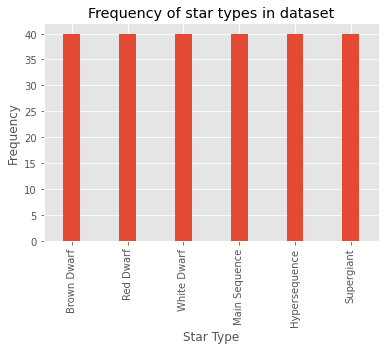

In [130]:
#Histogram of star type

z = [0, 1, 2, 3, 4, 5]
labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Hypersequence', 'Supergiant']
plt.xticks(z, labels,rotation=90)
plt.xlim([-0.5, 5.5])
plt.style.use('ggplot')
#plt.hist(resumeData['Category'], rwidth=0.5)
plt.hist(df['Star type'], rwidth=0.3, bins=np.arange(50)-0.5)
plt.ylabel('Frequency')
plt.xlabel('Star Type');
plt.title('Frequency of star types in dataset')
plt.show()


In [131]:
#Transforming the categorical variables in the dataframe such as the Star color and Spectral Class into numeric data that the logistic regression classifier can understand
starColor = pd.get_dummies(df['Star color'], drop_first = True)

spectralClass = pd.get_dummies(df['Spectral Class'], drop_first = True)

encoded_df = pd.concat([df, starColor, spectralClass], axis = 1)

encoded_df.drop(['Star color', 'Spectral Class'], axis = 1, inplace = True)

encoded_df.head(3).T



,0,1,2
Temperature (K),3068.0000,3042.0000,2600.0000
Luminosity(L/Lo),0.0024,0.0005,0.0003
Radius(R/Ro),0.1700,0.1542,0.1020
Absolute magnitude(Mv),16.1200,16.6000,18.7000
Star type,0.0000,0.0000,0.0000
Blue,0.0000,0.0000,0.0000
Blue White,0.0000,0.0000,0.0000
Blue white,0.0000,0.0000,0.0000
Blue white,0.0000,0.0000,0.0000
Blue-White,0.0000,0.0000,0.0000


In [135]:
y_data = encoded_df['Star type']

x_data = encoded_df.drop('Star type', axis = 1)

#Split dataset 70% to train dataset and 30% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size = 0.3)

from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(solver='lbfgs', max_iter=10000)
logisticReg.fit(x_train, y_train)
# Returns a NumPy Array
predictions = logisticReg.predict(x_test)


# Use score method to get accuracy of model
y_pred = logisticReg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticReg.score(x_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.97


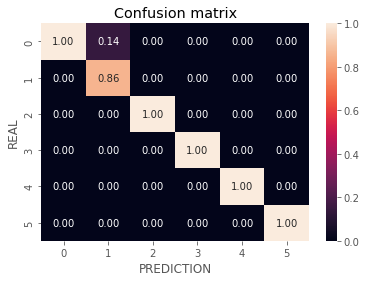

In [136]:
#Confusion Matrix
labels = df['Star type'].unique()
confusionMatrix = confusion_matrix(y_test, y_pred, labels=labels, normalize="pred")
heatMapData = pd.DataFrame(confusionMatrix , index=labels, columns=labels, )

sns.heatmap(heatMapData, annot = True, fmt = '0.2f')
plt.title('Confusion matrix')
plt.xlabel('PREDICTION')
plt.ylabel('REAL')
plt.show()

#Export model and vectorizer
#Make a function that receives text and runs it through the model